In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Ch09, P.8

In [48]:
mydata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3600/Cartype2.txt",sep='\t')
I=mydata.Country.nunique()
J=mydata.Type.nunique()
A=pd.get_dummies(mydata.Country).to_numpy()[:,0:1]
B=pd.get_dummies(mydata.Type).to_numpy()[:,[0,1,2,3]]
n=A.shape[0]
xi=mydata.Mileage
AB=np.array([])
for a,b in zip(A,B):
  AB=np.r_[AB,np.kron(a,b)]
AB=AB.reshape(n,-1)
x=np.c_[np.ones(n),xi,A,B,AB]
y=mydata.Price.to_numpy()

In [44]:
sst=sum((y-y.mean())**2)
dft=n-1

In [57]:
ixtx=np.linalg.inv(x.T @ x)
beta=ixtx @ x.T @ y
print(beta)
yhat=x @ beta
res=y-yhat
sse=np.sum(res**2)
dfe=n-I*J-1
mse=sse/dfe

[ 21020.24 -399.40  1512.40 -906.63  1760.36  308.54  970.23  503.87
  6158.40 -2881.71 -118.27]


In [66]:
x1=x[:,0:7]
ixtx1=np.linalg.inv(x1.T @ x1)
beta1=ixtx1 @ x1.T @ y
yhat=x1 @ beta1
res=y-yhat
sse1=np.sum(res**2)
ssi=sse1-sse
ssi
dfi=(I-1)*(J-1)
msi=ssi/dfi
ssm=sst-sse-ssi
dfm=dft-dfe-dfi
msm=ssm/dfm
fRatio=msi/mse
pvalue=1-stats.f(dfi,dfe).cdf(fRatio)
print (f"{'source':<12} {'ss':>12} {'df':>3} {'ms':>12} {'F':>5} {'p-value':>7}")
print (f"{'main':<12} {ssm:12.2f} {dfm:>3}")
print (f"{'interaction':<12} {ssi:12.2f} {dfi:>3} {msi:12.2f} {fRatio:5.2f} {pvalue:7.4f}")
print (f"{'error':<12} {sse:12.2f} {dfe:>3} {mse:12.2f}")
print (f"{'total':<12} {sst:12.2f} {dft:>3}")

source                 ss  df           ms     F p-value
main         525097020.88   6
interaction   78002526.65   4  19500631.66  6.64  0.0010
error         70535548.01  24   2938981.17
total        673635095.54  34


In [50]:
mu=beta[0]
a=np.append(beta[2],0)
b=np.append(beta[3:7],0)
g=np.r_[np.append(beta[7:11],0),np.zeros(5)].reshape(2,5)
means=mu+np.add.outer(a,b)+g
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
means

array([[ 22129.89,  30451.40,  19959.48,  23384.60,  22532.65],
       [ 20113.61,  22780.60,  21328.78,  21990.47,  21020.24]])

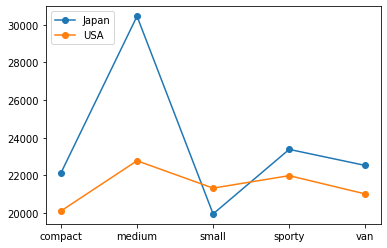

In [51]:
lbl=['compact','medium','small','sporty','van']
plt.plot(lbl, means[0,:],label='Japan',marker='o')
plt.plot(lbl, means[1,:],label='USA',marker='o')
plt.legend(loc="upper left")
plt.show()

P.11

In [59]:
c=np.array([0,0,1,0,0,0,0,1,0,0,0])
l=c @ beta
sel=np.sqrt(mse*c @ ixtx @ c)
myt=stats.t(dfe).ppf(.975)
l,sel,[l-sel*myt,l+sel*myt]

(2016.2770144386911,
 1078.202059673685,
 [-209.02266566619642, 4241.576694543579])

In [63]:
c=np.array([[0,0,1,0,0,0,0,1,0,0,0],
            [0,0,1,0,0,0,0,0,1,0,0],
            [0,0,1,0,0,0,0,0,0,1,0],
            [0,0,1,0,0,0,0,0,0,0,1],
            [0,0,1,0,0,0,0,0,0,0,0]])
l=c @ beta
sel=np.sqrt(mse*np.diagonal(c @ ixtx @ c.T))
myt=stats.t(dfe).ppf(.975)
l,sel,l-sel*myt,l+sel*myt

(array([ 2016.28,  7670.80, -1369.30,  1394.13,  1512.40]),
 array([ 1078.20,  1214.20,  1426.88,  1566.51,  2104.19]),
 array([-209.02,  5164.81, -4314.23, -1838.98, -2830.44]),
 array([ 4241.58,  10176.78,  1575.62,  4627.24,  5855.25]))